In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
!conda install --yes sympy

Solving environment: done

## Package Plan ##

  environment location: /Users/gprabhakar/miniconda3

  added / updated specs:
    - sympy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       h033912b_0         142 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-22.11.1              |   py39h6e9494a_1         874 KB  conda-forge
    gmpy2-2.1.2                |   py39h2da61ea_1         166 KB  conda-forge
    mpc-1.2.1                  |       hbb51d92_0         103 KB  conda-forge
    mpmath-1.2.1               |     pyhd8ed1ab_0         437 KB  conda-forge
    openssl-3.0.7              |       hfd90126_1         2.2 MB  conda-forge
    ruamel.yaml-0.17.21        |   py39ha30fb19_2         173 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py39ha30fb19_1         118 KB  conda-forge
    sympy-1.11

In [25]:
# starting variables
x = np.linspace(-10, 10)
z = np.linspace(-10, 0)
y = np.linspace(-10, 10)

xx, zz = np.meshgrid(x, z)

i = 0.1 # Inject 100 mA of current

/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_2431/1671989119.py:8: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(np.log(v), extent=[min(x),max(x),min(z),max(z)], aspect='auto')


Text(0, 0.5, 'log(V)')

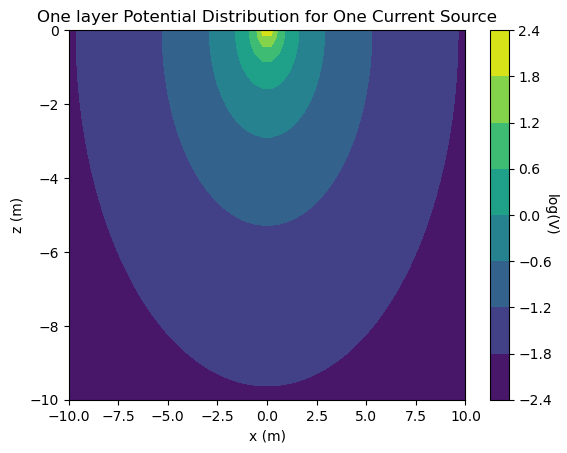

In [117]:
# one layer model potential distribution

rho = 100 # Resistivity of soil
r = (xx**2 + zz**2)**0.5

v = rho*i/(2*3.14159*r)

plt.contourf(np.log(v), extent=[min(x),max(x),min(z),max(z)], aspect='auto')
cbar = plt.colorbar()
plt.title("One layer Potential Distribution for One Current Source")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
cbar.ax.set_ylabel('log(V)', rotation=270)

In [3]:
# put the current source at -4 m and add a current sink at +4 m.
rho = 100 # Resistivity of soil

# source
rsource = ((xx - 4)**2 + zz**2)**0.5
vsource = rho*i/(2*3.14159*rsource)

# sink
rsink = ((xx + 4)**2 + zz**2)**0.5
vsink = -1*rho*i/(2*3.14159*rsink)

plt.contourf((vsource + vsink)[:40,:], extent=[min(x),max(x),-8,max(z)], aspect='auto')
cbar = plt.colorbar()
plt.title("One layer Potential Distribution \nfor A Current Source and Sink")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
cbar.ax.set_ylabel('V', rotation=270)

NameError: name 'xx' is not defined

In [14]:
# two layers
from scipy.special import j0
from scipy.integrate import quad

rhomap = [[100, 1], [200, np.inf]]

r = 3
def integrand(lamb,rhomap=rhomap, r=r):
    # print(r)
    p1 = rhomap[0][0]
    h1 = rhomap[0][1]
    
    p2 = rhomap[1][0]
    
    k1 = (p2 - p1)/(p2 + p1)
    return k1*np.exp(-2*lamb*h1)*j0(lamb*r)/(1 - k1*np.exp(-2*lamb*h1))



lamb = np.linspace(0, 1000)
integrand.r = 5
print(integrand.r)
ker = integrand(lamb, rhomap)

# plt.imshow(ker)
# plt.colorbar()
r = r+1
quad(integrand, 0, np.inf)



5


(0.12218871549238476, 1.2114138236960997e-08)

In [58]:
def potential(r, rhomap, i=0.1):
    # print(rhomap)
    p1 = rhomap['1'][0]
    h1 = rhomap['1'][1]

    p2 = rhomap['2'][0]

    k1 = (p2 - p1)/(p2 + p1)
    
    def integrand(lamb,rhomap=rhomap, r=r):
        return 1+ 2*(k1*np.exp(-2*lamb*h1)*j0(lamb*r)/(1 - k1*np.exp(-2*lamb*h1)))
    
    return (p1*i/(2*3.14159))*quad(integrand, 0, np.inf)[0]

potential(2, rhomap1)

/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_791/11334796.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return (p1*i/(2*3.14159))*quad(integrand, 0, np.inf)[0]


-1.4646455219084644

In [81]:
x = np.linspace(-100, 100)
z = np.linspace(-10, 0)
y = np.linspace(-100, 100)

xxx, yyy = np.meshgrid(x, y)

rhomap1 = {'1':[100, 5], '2':[200, np.inf]}
vfunc = np.vectorize(potential)
v1 = vfunc((xxx**2+yyy**2)**0.5, rhomap=rhomap1)
rhomap2 = {'1':[100, 1], '2':[200, np.inf]}
v2 = vfunc((xxx**2+yyy**2)**0.5, rhomap=rhomap2)

/var/folders/_7/x_mxrhfx0gq6pt61nr_x9t880000gn/T/ipykernel_791/11334796.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return (p1*i/(2*3.14159))*quad(integrand, 0, np.inf)[0]


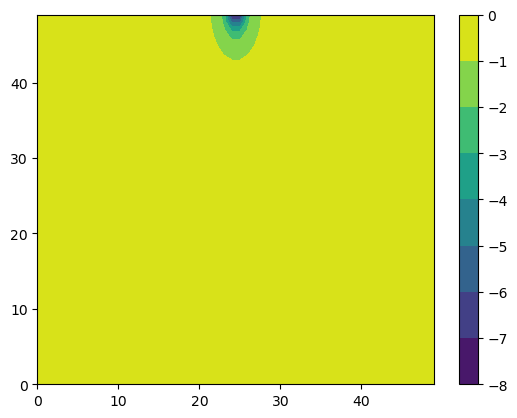

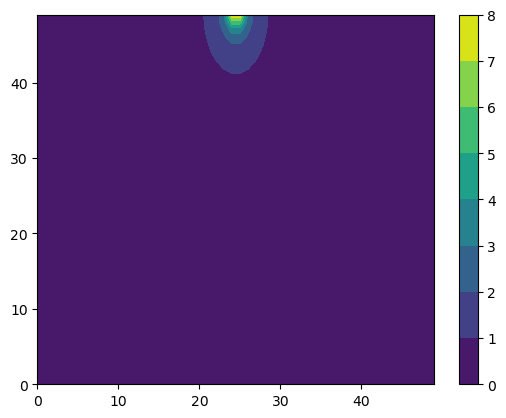

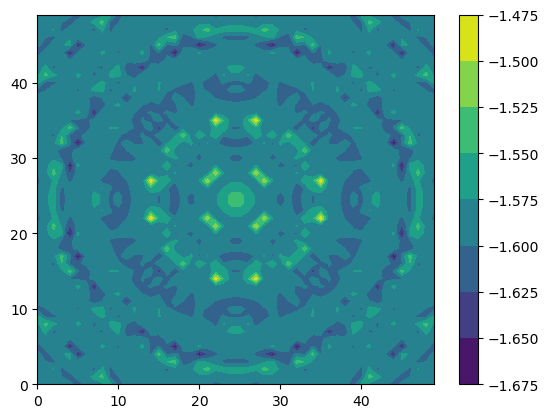

In [80]:
plt.contourf(v - rho*i/(2*3.14159*((xx**2+zz**2)**0.5)))
plt.colorbar()
plt.show()

plt.contourf(rho*i/(2*3.14159*((xx**2+zz**2)**0.5)))
plt.colorbar()
plt.show()

plt.contourf(v2)
plt.colorbar()